# Augmentation Task 1

### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
print(tf.__version__)
tf.device("/gpu:0")

2.6.2


#### Define Methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()
    
def augment(rotationAngleRange, zoomRange, shiftx, shifty, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(rotation_range=rotationAngleRange,zoom_range=zoomRange,
                                width_shift_range=shiftx, height_shift_range=shifty)
    
    #new_shape = (56,56)
    #returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    #for idx in range(xDataSet.shape[0]):
        #returnDataSet[idx][14: 14 + 28, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    displaySamplesFromDataSet(xDataSet, yDataset)

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(xDataSet.reshape(xDataSet.shape[0], 28, 28, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
            ax = axes2[i//num_col, i%num_col]
            ax.imshow(X[i].reshape(28,28), cmap='gray_r')
            ax.set_title('Label: {}'.format(int(Y[i])))
            break
    plt.tight_layout()
    plt.show()
    return xDataSet

#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

#### Building a Training Pipeline - With Random Rotations

TRAIN BEFORE:



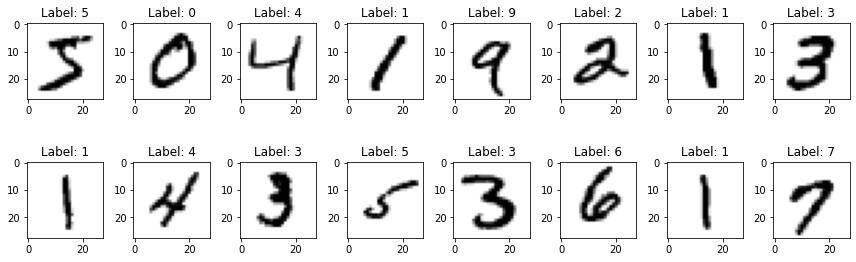

TRAIN AFTER:



KeyboardInterrupt: 

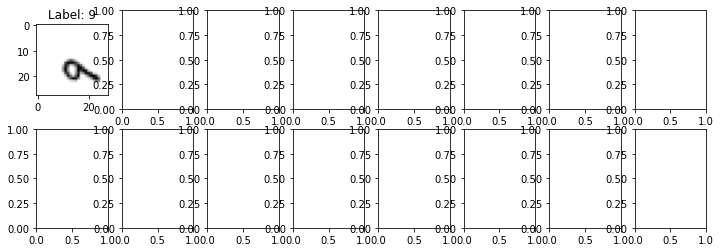

In [4]:
ds_train = augment(100, [0.5,2], 0.25, 0.25, train_images, train_labels, "TRAIN")

#### Building an Evaluation Pipeline

In [ ]:
displaySamplesFromDataSet(test_images, test_labels)

#### Create and Train the Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

#### Evaluate the Model

In [ ]:
evaluate(test_images, test_labels, model)